# Trabajo semanal N°8

## Parte 1: Matriz admitancia indefinida

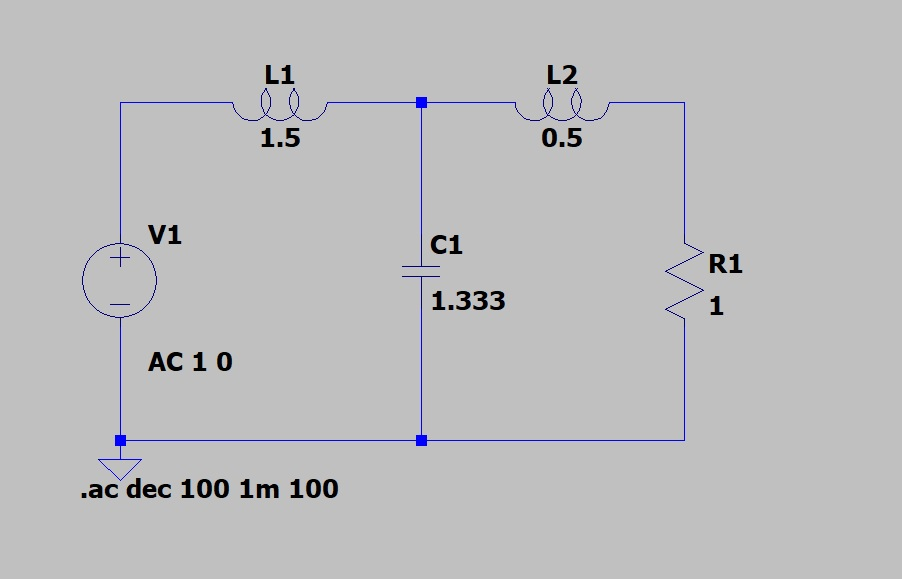


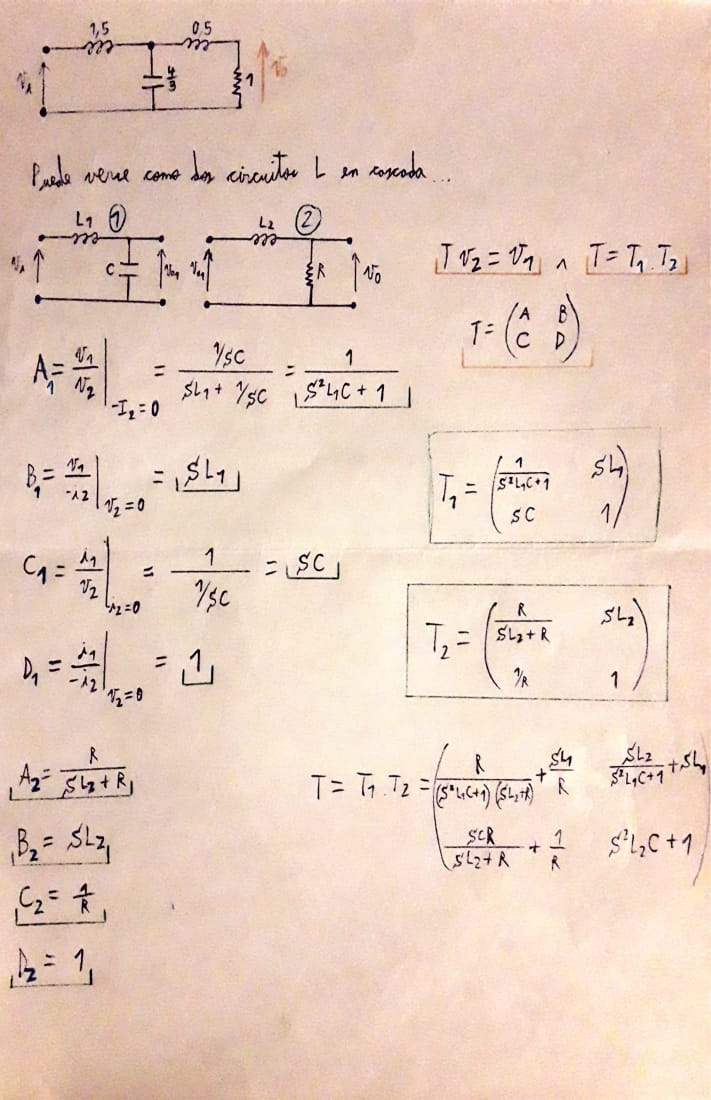

No me queda muy bien la transferencia, me falta un $sL_1$ en el denominador

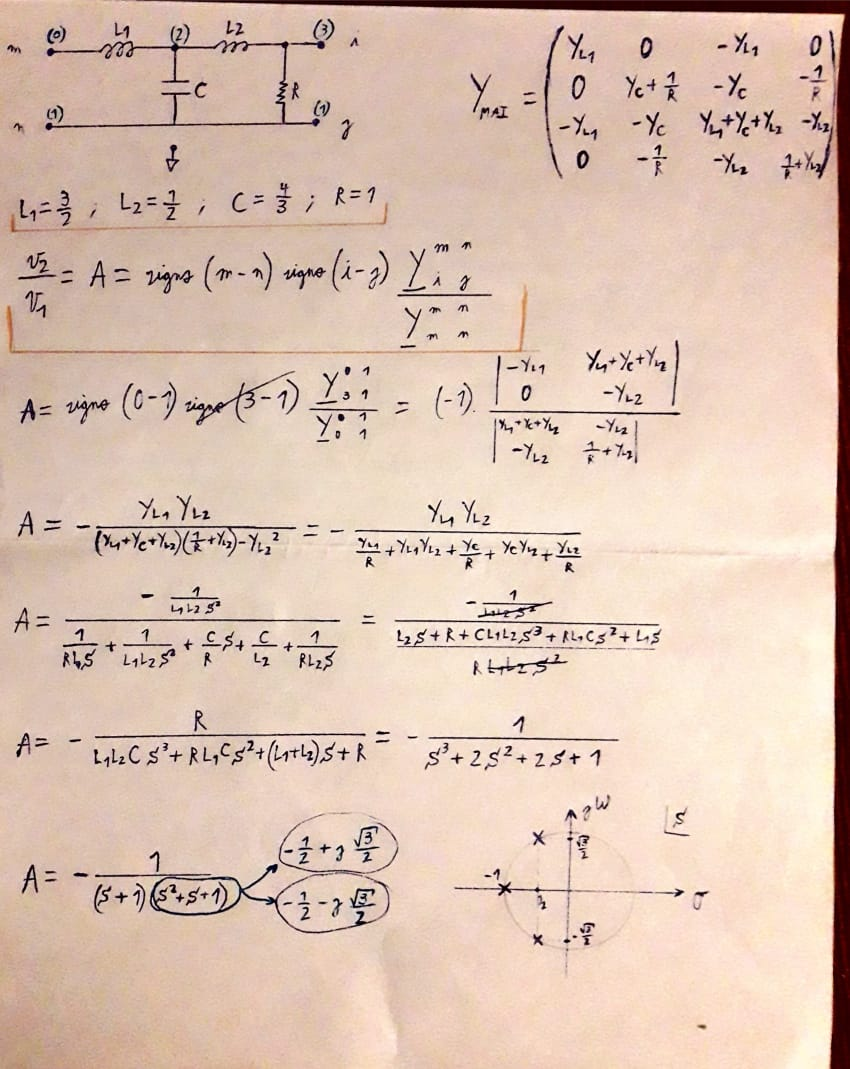

Tengo tres polos en la circunferencia de radio unitario, en la simulación debería verse una $f_c \cong 0.16\frac{rad}{s}$ y una caida de $ 60\frac{dB}{dec} $

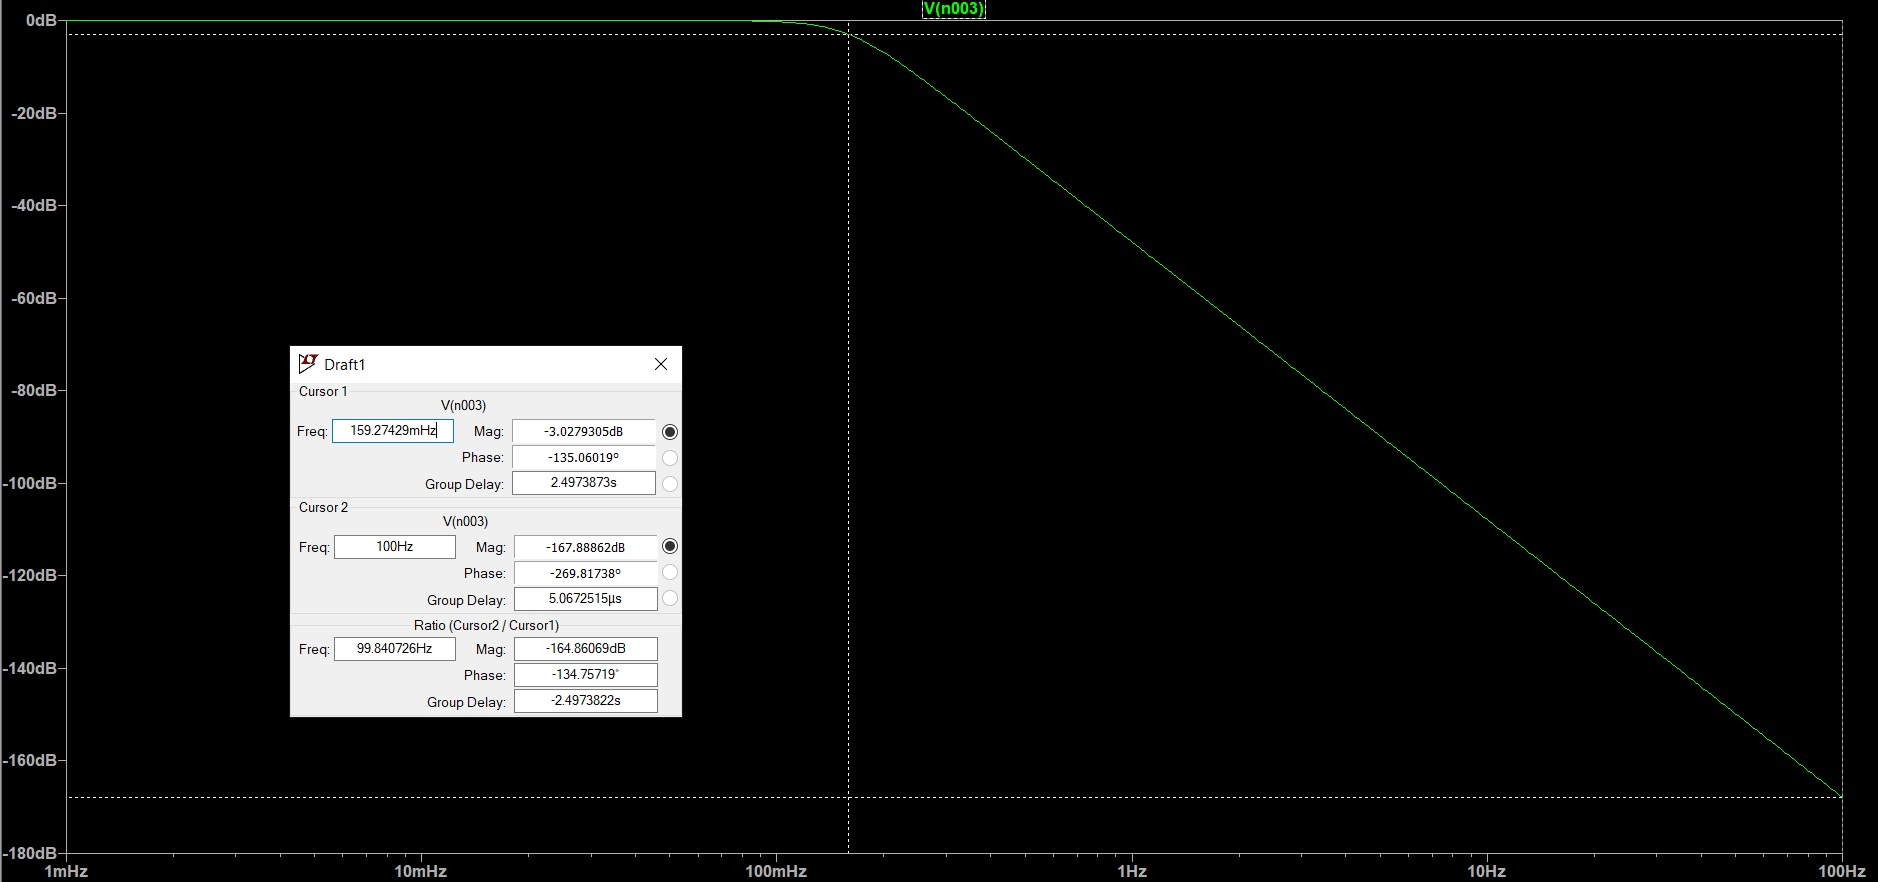

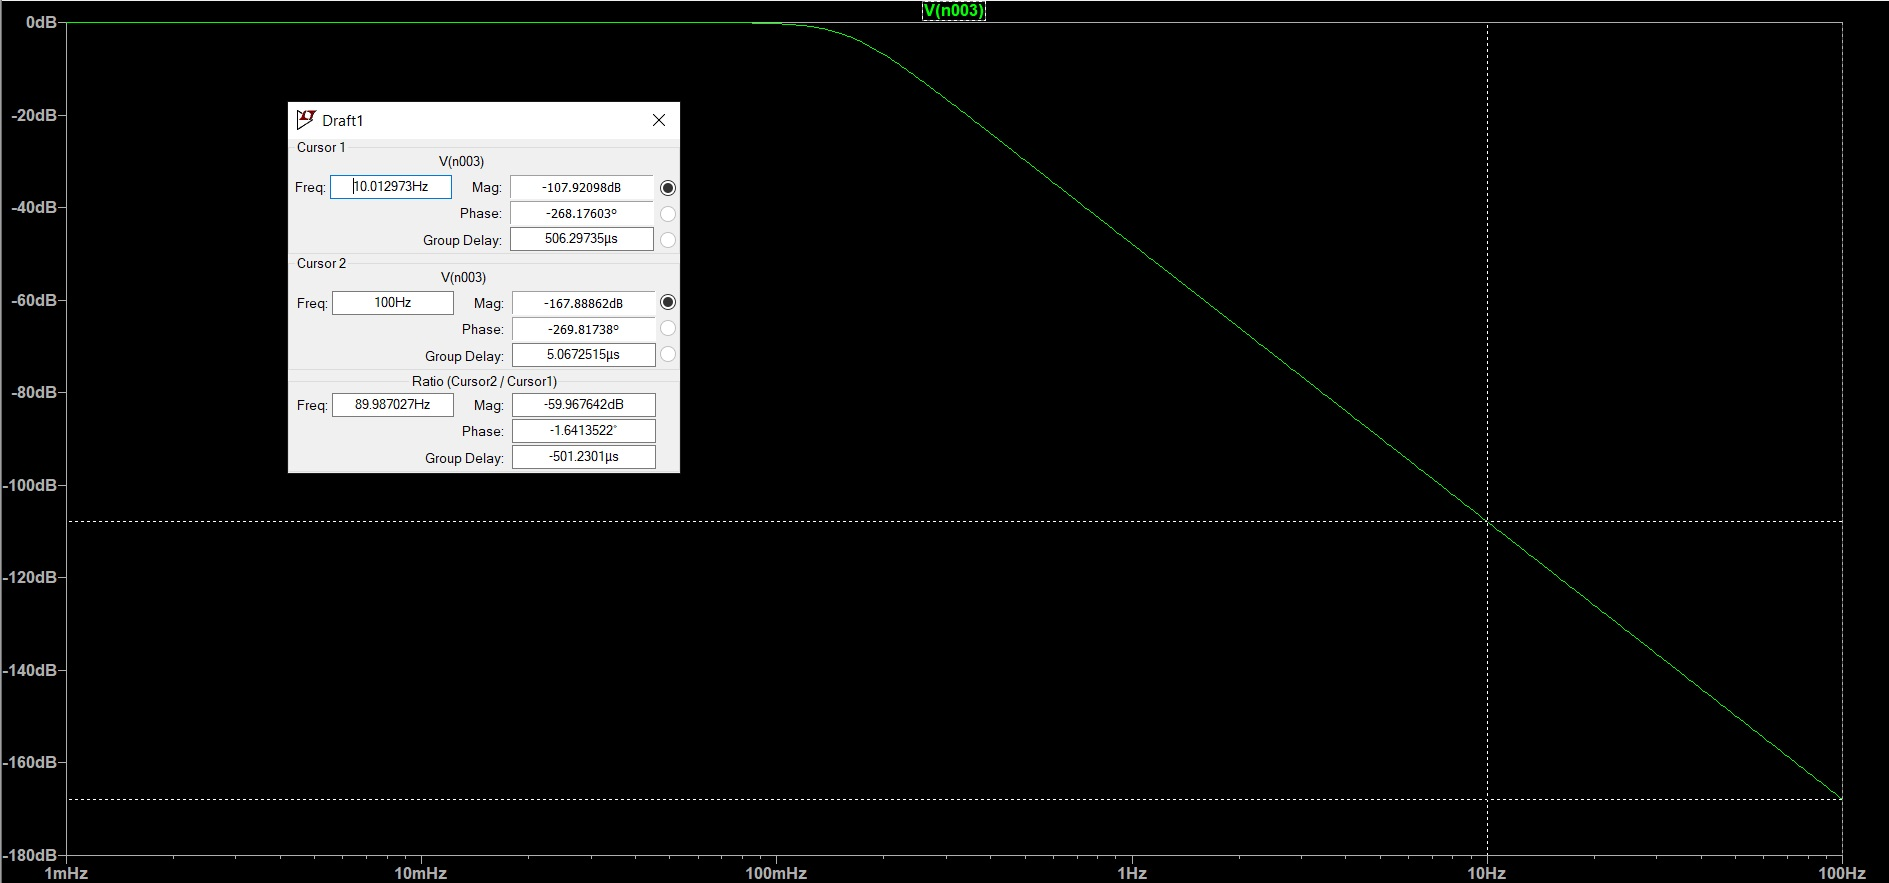

Se cumplen las dos condiciones anteriores, la simulación verifica el desarrollo analítico

## Parte 2: Filtros digitales

### Emular digitalmente un filtro Butterworth de orden 2 $ f_c = 1KHz $

La transferencia normalizada del filtro propuesto es:

$$ H_{(s)} = \frac{1}{s^2+\frac{s}{Q}+1} $$

Y aplicando la transformación $s = k\frac{z-1}{z+1}$ se obtiene $H_{(z)}$


In [2]:
import numpy as np
import sympy as sp
import scipy.signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
from splane import pzmap
import sys

s, z = sp.symbols('s z', complex=True)
k, fs, Q, Om, fc = sp.symbols('k fs Q Om fc', real=True, positive=True)

Ts = fc**2/(s**2+s*fc/Q+fc**2)
fz = k * (z-1)/(z+1)

Tz = sp.collect(sp.simplify(sp.expand(Ts.subs(s, fz))), z)

display(Tz)

Q*fc**2*(z + 1)*(z**2 + 2*z + 1)/(Q*fc**2*(z + 1)*(z**2 + 2*z + 1) + Q*k**2*(z + 1)*(z**2 - 2*z + 1) + fc*k*(z - 1)*(z**2 + 2*z + 1))

Si $ k = 2f_s \wedge f_s = 100kHz $ y además se tiene un $ Q = \frac{1}{\sqrt{2}} $ correspondiente a un filtro Butter de segundo orden

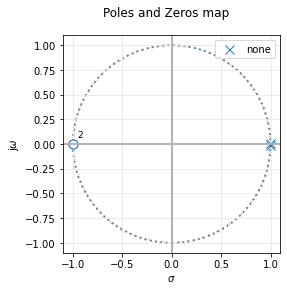

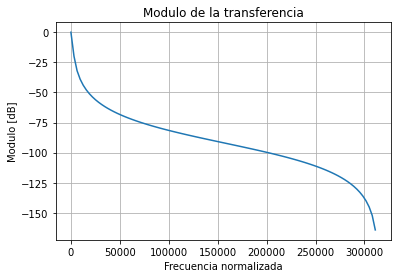

In [16]:
fs = 100000
fc = 1000
Q = np.sqrt(2)/2
k = 2*fs

kz2 = Q * k**2  + Q*fc**2 + k*fc
kz1 = -2 * Q * k**2 + 2 * Q * fc**2
kz0 = Q * k**2  + Q * fc**2 - k*fc

numz =  Q * fc**2 * np.array([1, 2, 1])
denz =  np.array([kz2, kz1, kz0])

digital_filter = sig.TransferFunction( numz, denz, dt=1/fs)

ww, module, phase = digital_filter.bode()

sig.dbode

pzmap(digital_filter, annotations = False,  fig_id=1)

plt.figure()

plt.plot(ww, module)

plt.title('Modulo de la transferencia')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')


Se observa el comportamiento pasa bajos del filtro, sin embargo, hay sobremuestreo y eso se puede observar en el diagrama de polos y ceros, cuyos polos se ubican muy cercano a la frecuencia cero. Se puede perder información útil (ubicada en la banda de paso) porque no se le dedica suficiente ancho de banda.

### b) Se cambia la $ f_s $ a 10kHz y se analiza nuevamente

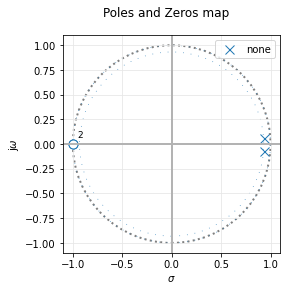

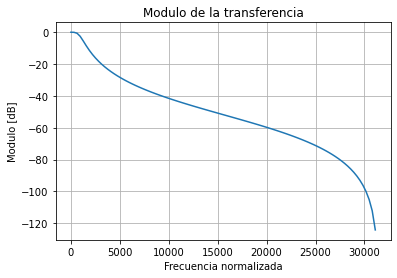

In [18]:
fs = 10000
k = 2*fs

kz2 = Q * k**2  + Q*fc**2 + k*fc
kz1 = -2 * Q * k**2 + 2 * Q * fc**2
kz0 = Q * k**2  + Q * fc**2 - k*fc

numz =  Q * fc**2 * np.array([1, 2, 1])
denz =  np.array([kz2, kz1, kz0])

digital_filter = sig.TransferFunction( numz, denz, dt=1/fs)

ww, module, phase = digital_filter.bode()

sig.dbode

pzmap(digital_filter, annotations = False,  fig_id=1)

plt.figure()

plt.plot(ww, module)


plt.title('Modulo de la transferencia')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')



Reduciendo la frecuencia de muestro mejoran levemente los aspectos analizados anteriormente

### c) $ f_c = 6kHz \wedge f_s = 100kHz $

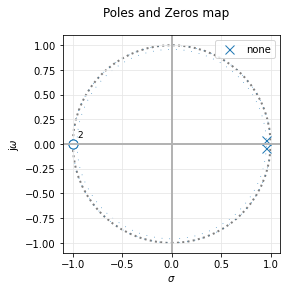

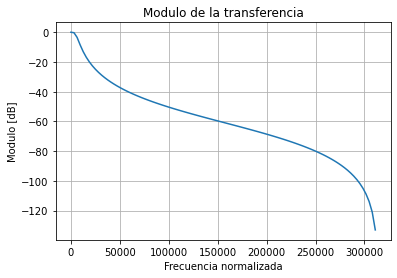

In [12]:
fc = 6000
fs = 100000
k = 2*fs

kz2 = Q * k**2  + Q*fc**2 + k*fc
kz1 = -2 * Q * k**2 + 2 * Q * fc**2
kz0 = Q * k**2  + Q * fc**2 - k*fc

numz =  Q * fc**2 * np.array([1, 2, 1])
denz =  np.array([kz2, kz1, kz0])

digital_filter = sig.TransferFunction( numz, denz, dt=1/fs)

ww, module, phase = digital_filter.bode()

sig.dbode

pzmap(digital_filter, annotations = False,  fig_id=1)

plt.figure()

plt.plot(ww, module)

plt.title('Modulo de la transferencia')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')



### $ f_c = 6kHz \wedge f_s = 10kHz $

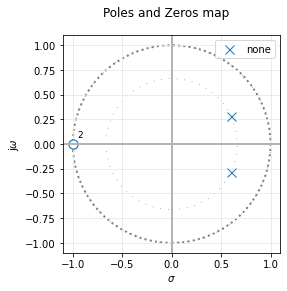

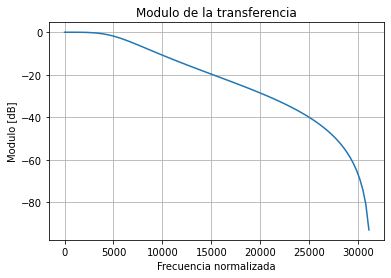

In [13]:
fs = 10000
k = 2*fs

kz2 = Q * k**2  + Q*fc**2 + k*fc
kz1 = -2 * Q * k**2 + 2 * Q * fc**2
kz0 = Q * k**2  + Q * fc**2 - k*fc

numz =  Q * fc**2 * np.array([1, 2, 1])
denz =  np.array([kz2, kz1, kz0])

digital_filter = sig.TransferFunction( numz, denz, dt=1/fs)

ww, module, phase = digital_filter.bode()

sig.dbode

pzmap(digital_filter, annotations = False,  fig_id=1)

plt.figure()

plt.plot(ww, module)

plt.title('Modulo de la transferencia')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')


Para este último caso debería usarse un filtro de prewarping para que las transferencias de los filtros analógico y digital tengan la misma caída (-3dB) en la frecuencia de corte, el filtro es necesario porque la frecuencia de corte del filtro pasa bajos y la frecuencia de muestreo están muy próximas ($f_c > \frac{1}{4}f_s$)

### Filtro de media móvil


$ h_{1(k)} = [1,1] $

$ H_{1(z)} = 1+z^{-1} = \frac{z+1}{z} $




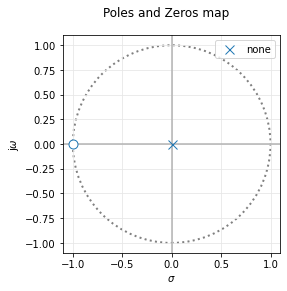

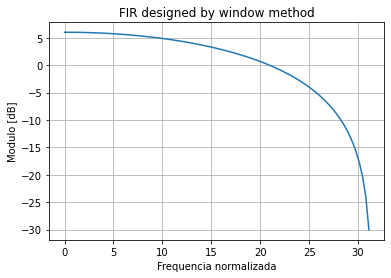

In [5]:
fs = 10

numz =  np.array([1, 1])
denz =  np.array([1, 0])

digital_filter = sig.TransferFunction( numz, denz, dt=1/fs)

ww, module, phase = digital_filter.bode()

sig.dbode

pzmap(digital_filter, annotations = False,  fig_id=1)

plt.figure()

plt.plot(ww, module)

plt.title('Modulo de la transferencia')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')


Los filtros FIR pasa bajos muestran a la salida la media aritmética de la entrada, para obtenerla, se deben sumar todas las entradas y dividir por la cantidad de muestras. 

$ h_{1(k)} = [1,1,1] $

$ H_{1(z)} = 1+z^{-1}+z^{-2} = \frac{z^2+z+1}{z^2} $

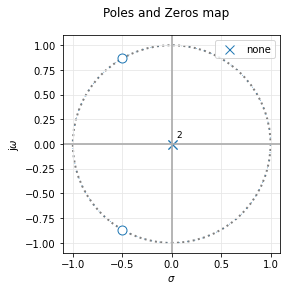

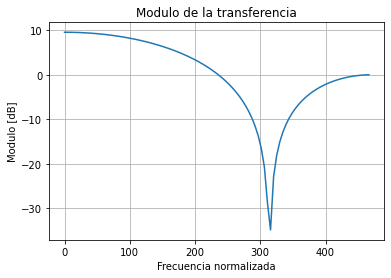

In [6]:
fs = 150
numz =  np.array([1, 1, 1])
denz =  np.array([1, 0, 0])

digital_filter = sig.TransferFunction( numz, denz, dt=1/fs)

ww, module, phase = digital_filter.bode()

sig.dbode

pzmap(digital_filter, annotations = False,  fig_id=1)

plt.figure()

plt.plot(ww, module)

plt.title('Modulo de la transferencia')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')


Para eliminar la frecuencia de 50 Hz con el filtro propuesto se necesita muestrear a una $f_s = 150Hz$.
Hay que aclarar que la frecuencia eliminada que se ve en el gráfico es $\omega = 2\pi150Hz \cong 314\frac{rad}{s} $

## Filtro diferenciador

$ h_{1(k)} = [1,-1] $

$ H_{1(z)} = 1-z^{-1} = \frac{z-1}{z} $

C:\Users\fcfra\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


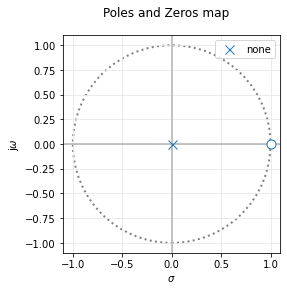

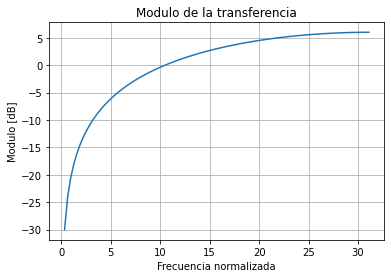

In [8]:
fs = 10

numz =  np.array([1, -1])
denz =  np.array([1, 0])

digital_filter = sig.TransferFunction( numz, denz, dt=1/fs)

ww, module, phase = digital_filter.bode()

sig.dbode

pzmap(digital_filter, annotations = False,  fig_id=1)

plt.figure()

plt.plot(ww, module)

plt.title('Modulo de la transferencia')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')


Como el filtro tiene una respuesta lineal en fase con una pendiente de $ -\frac{1}{2} $ el retardo de grupo es constante e igual a $ \frac{1}{2} $ muestras, esto se debe a que es uno de N par, no otorgando un retardo de un numero no entero. 

$ h_{1(k)} = [1,0,-1] $

$ H_{1(z)} = 1+0-z^{-2} = \frac{z^2-1}{z^2} $

C:\Users\fcfra\anaconda3\lib\site-packages\scipy\signal\ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


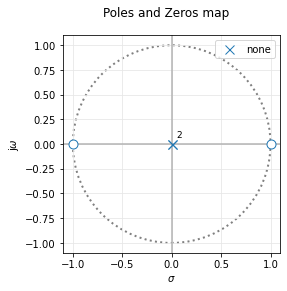

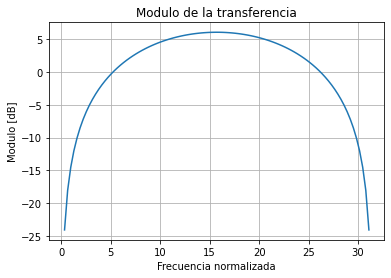

In [9]:
fs = 10

numz =  np.array([1, 0, -1])
denz =  np.array([1, 0, 0])

digital_filter = sig.TransferFunction( numz, denz, dt=1/fs)

ww, module, phase = digital_filter.bode()

sig.dbode

pzmap(digital_filter, annotations = False,  fig_id=1)

plt.figure()

plt.plot(ww, module)

plt.title('Modulo de la transferencia')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')


En este caso al ser un filtro de N impar, el retardo de grupo es entero e igual a 1 muestra